# Ejercicio 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class Perceptron:
    def __init__(self, inputs, f_activacion) -> None:
        self.inputs = inputs
        self.f_activacion = f_activacion

        # Inicialización de los pesos
        # Se agrega un elemento para representar el bias
        # y se resta 0.5 para que quede entre -0.5 y 0.5
        self.w = np.random.rand(inputs + 1) - 0.5
    
    def eval(self, patron) :
        x = np.hstack((-1, patron[:self.inputs]))
        # Producto interno
        y = np.inner(x, self.w)
        # No linealidad
        z = self.f_activacion(y)
        # Error
        err = patron[-1] - z
        return (x, z, err)

    def train(self, patron, alpha) :
        # Evaluación
        (x, z, err) = self.eval(patron)
        # Actualización de pesos
        self.w = self.w + (alpha * err) * x
        return (self.w, z, err)

In [4]:
ds_train = np.genfromtxt('icgtp1datos/OR_trn.csv', delimiter=',')
ds_train_size = ds_train.shape[0]

ds_test = np.genfromtxt('icgtp1datos/OR_tst.csv', delimiter=',')
ds_test_size = ds_test.shape[0]

In [5]:
# Función de activación "signo"
def f_sign(a):
    return (np.heaviside(a, 1) * 2) - 1

In [6]:
perceptron = Perceptron(ds_train.shape[1]-1, f_sign)

N = 20          # Nro de épocas
alpha = 1E-4    # Tasa de aprendizaje
nu = 0.3        # Umbral de error

# Para calcular el error se utilizará un conjunto de patrones de tamaño 10%
# del total
N_val = int(np.floor(ds_train_size * 0.1))

# Entrenamiento por epocas
for i in range(N):
    for patron in ds_train: # Para todos los patrones de train
        perceptron.train(patron, alpha)
    
    # Corte del entrenamiento por umbral de error
    errores = 0
    for patron in ds_train[np.random.choice(ds_train_size, size=(N_val), replace=False)]:
        (_, z, _) = perceptron.eval(patron)
        errores += int(z != patron[-1])
    err_med = errores / N_val
    
    # Evolución del error por época
    print(f'Epoca {i}: error medio = {err_med * 100:.2f} %')

    # Si el error calculado es menos del umbral cortar
    if (err_med < nu):
        break

Epoca 0: error medio = 52.00 %
Epoca 1: error medio = 49.00 %
Epoca 2: error medio = 0.00 %


In [7]:
# Test
errores = 0
for patron in ds_test:
    (_, z, _) = perceptron.eval(patron)
    errores += int(z != patron[-1])
err_med = errores / ds_test_size

print(f'Error en test {err_med * 100:.2f} %')

Error en test 0.00 %


In [87]:
p = Perceptron(ds_train.shape[1]-1, f_sign)

N = 20          # Nro de épocas
alpha = 1E-4    # Tasa de aprendizaje
nu = 0.03        # Umbral de error

# Para calcular el error se utilizará un conjunto de patrones de tamaño 10%
# del total
N_val = int(np.floor(ds_train_size * 0.1))

pesos = np.array([[]])

# Entrenamiento por epocas
for i in range(N):
    for idx, patron in enumerate(ds_train): # Para todos los patrones de train
        (w, _, _) = p.train(patron, alpha)
        if (idx % 40 == 0): # Cada veinte, me guardo los pesos
            pesos = np.append(pesos, w)
    
    # Corte del entrenamiento por umbral de error
    errores = 0
    for patron in ds_train[np.random.choice(ds_train_size, size=(N_val), replace=False)]:
        (_, z, _) = p.eval(patron)
        errores += int(z != patron[-1])
    err_med = errores / N_val
    
    # Evolución del error por época
    print(f'Epoca {i}: error medio = {err_med * 100:.2f} %')

    # Si el error calculado es menos del umbral cortar
    if (err_med < nu):
        break

# Reordenar los pesos
pesos = pesos.reshape((-1, 3))

Epoca 0: error medio = 25.00 %
Epoca 1: error medio = 28.50 %
Epoca 2: error medio = 29.50 %
Epoca 3: error medio = 2.50 %


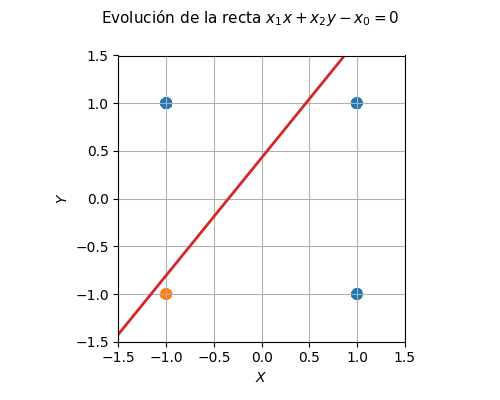

In [94]:
# Animación de la evolución de los pesos a partir de la recta x1 * x + x2 * y - x0 = 0

import matplotlib.animation as animation
%matplotlib widget

anim_fig = plt.figure(figsize=(5, 4), tight_layout=True)
anim_fig.suptitle('Evolución de la recta $x_1 x + x_2 y - x_0 = 0$',  fontsize=11)
anim_ax = anim_fig.add_subplot(autoscale_on=False, xlim=(-1.5, 1.5), ylim=(-1.5, 1.5))
anim_ax.set_aspect('equal')
anim_ax.grid()

anim_ax.set_xlabel('$X$')
anim_ax.set_ylabel('$Y$')

# Patrones
x_x = ds_train[:,0]
x_y = ds_train[:,1]
x_color = np.where(x_x > 0, 'C0', np.where(x_y > 0, 'C0', 'C1'))

anim_ax.scatter(x_x, x_y, c=x_color, s=5, marker='.')

# Perceptron
# x1 * x + x2 * y - x0 = 0
# Ecuacion recta
# y = -x1/x2 * x + x0/x2
# a = -x1/x2
# b = x0/x2
# Simplificacion
# y = a * + b
a = np.divide(-pesos[:,1], pesos[:,2])
b = np.divide(pesos[:,0], pesos[:,2])

xx = np.arange(-3, 3, 0.01)
line, = anim_ax.plot(xx, a[0] * xx + b[0], c='C3', linewidth=2)

# Label para el tiempo transcurrido
# time_template = 'time = %.1fs'
# time_text = anim_ax.text(0.05, 0.92, '', transform=anim_ax.transAxes)

def animate(i):
    line.set_ydata(a[i] * xx + b[i])

    # time_text.set_text(time_template % (t[i])) # Actualizar la label del t

    return line,

anim = animation.FuncAnimation(anim_fig, animate, frames=pesos.shape[0], interval=20, repeat=False)
plt.show()

In [96]:
writergif = animation.PillowWriter(fps=24)
anim.save('./caso-1.gif', writer=writergif)

%matplotlib inline

![](./caso-1.gif)